# Computer Vision Generator
---

> Konstantinos Mpouros <br>
> Github: https://github.com/konstantinosmpouros <br>
> Year: 2023 <br>

## 1. About the project

The **Computer Vision Generator** project is designed to explore the capabilities of large language models (LLMs) in the field of image and video generation. The goal of this notebook (**Video Generator**) is to create a script that receive either a textual description of a video or an image and the description and generate the corresponding video. This process will be conducted with the use of pretrained models for video processing from [huggingface](https://huggingface.co/).

By leveraging the power of LLMs, specifically trained for image synthesis, the script interprets natural language prompts and translates them into detailed, accurate images. This project showcases the potential of AI to bridge the gap between language and vision, enabling the seamless conversion of ideas into visuals. The use cases for such a system are vast, ranging from creative arts and media production to education and design. By automating the process of image creation based on descriptions, the **Computer Vision Generator** opens up new possibilities for users to bring their ideas to life quickly and efficiently.

## 2. Libraries

In [ ]:
# Pytorch
import torch

# Image retrieval and manipulation
from PIL import Image
import os

# Video export and display
from moviepy.editor import ImageSequenceClip
import numpy as np
from IPython.display import Video, display
import glob

# Video Generation
from diffusers import CogVideoXImageToVideoPipeline
from diffusers import I2VGenXLPipeline
from diffusers import StableVideoDiffusionPipeline
from diffusers import AnimateDiffPipeline, MotionAdapter

# Schedulers
from diffusers import LCMScheduler

In [ ]:
def count_mp4_files_with_name(directory, image_name):
    # Define the search pattern for mp4 files containing the image name
    pattern = os.path.join(directory, f"*{image_name}*.mp4")
    
    # Use glob to find files matching the pattern
    mp4_files = glob.glob(pattern)
    
    # Return the count of matching mp4 files
    return len(mp4_files)

In [ ]:
def export_video(frames, output_path, fps=8):
    np_frames = [np.array(frame) for frame in frames]
    
    clip = ImageSequenceClip(np_frames, fps=fps)
    clip.write_videofile(output_path, codec='libx264')
    print(f"Video exported to {output_path}")

## 3. Image to Video Generation

### 3.1 CogVideoX-5B

In [4]:
pipe = CogVideoXImageToVideoPipeline.from_pretrained(
    "THUDM/CogVideoX-5b-I2V",
    torch_dtype=torch.bfloat16
)

pipe.enable_sequential_cpu_offload()
pipe.vae.enable_tiling()
pipe.vae.enable_slicing()

pipe.to(torch.float16)

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

CogVideoXImageToVideoPipeline {
  "_class_name": "CogVideoXImageToVideoPipeline",
  "_diffusers_version": "0.30.3",
  "_name_or_path": "THUDM/CogVideoX-5b-I2V",
  "scheduler": [
    "diffusers",
    "CogVideoXDDIMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "T5EncoderModel"
  ],
  "tokenizer": [
    "transformers",
    "T5Tokenizer"
  ],
  "transformer": [
    "diffusers",
    "CogVideoXTransformer3DModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKLCogVideoX"
  ]
}

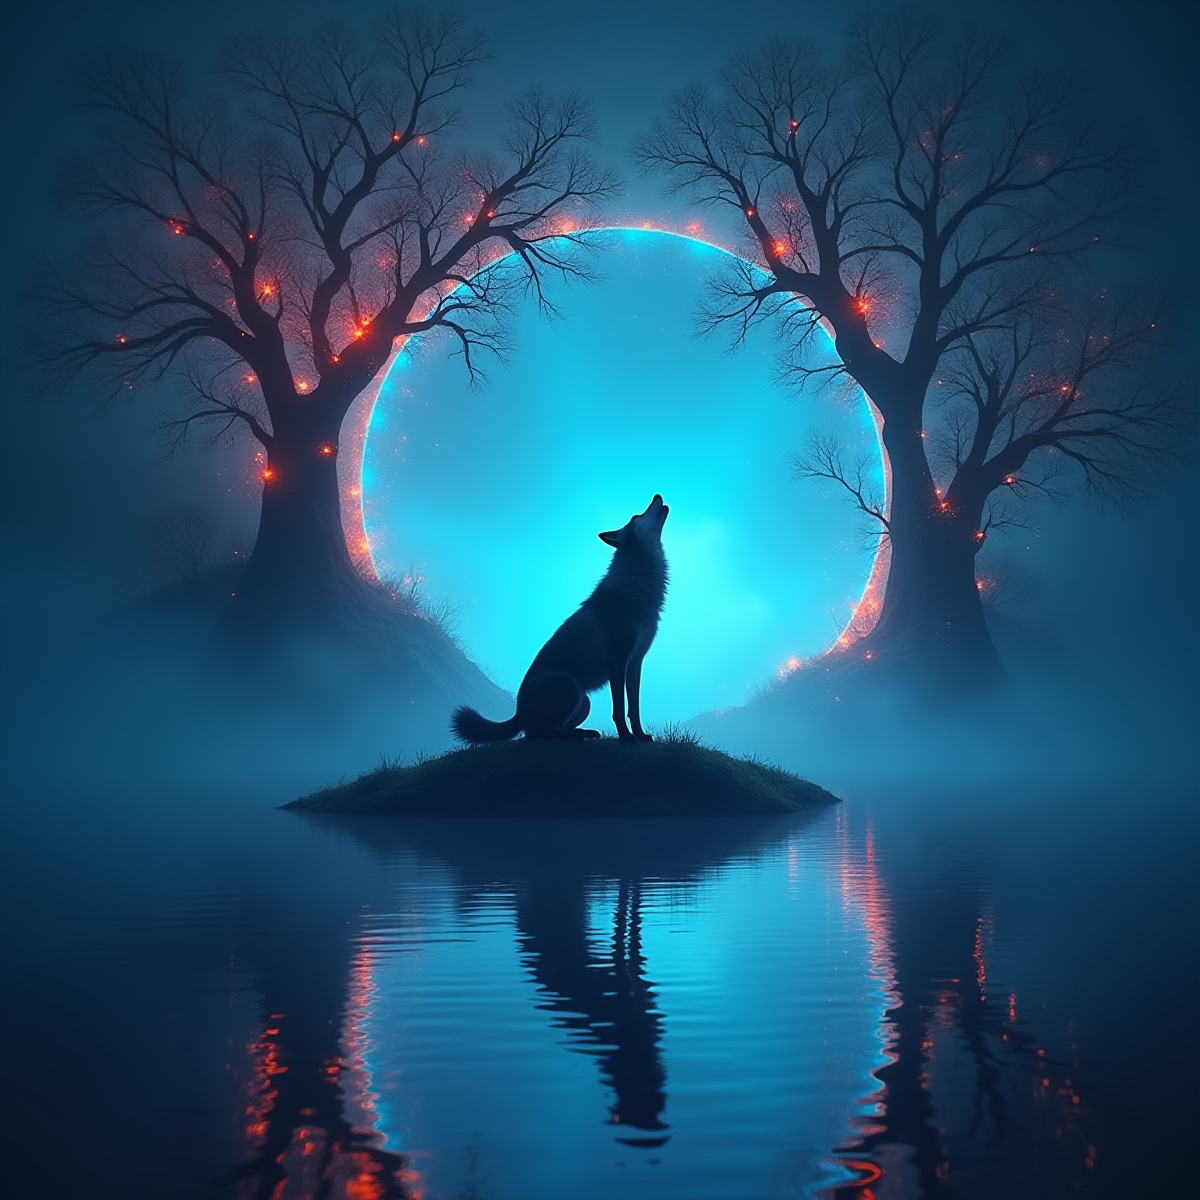

In [5]:
prompt = """
A lone wolf howling sadly in a surreal dreamscape under a starry sky. 
Above him, a swirling portal opens, shimmering with blue and purple hues, hinting at a parallel world.
Slowly animate the portal to pulsate and shift, drawing in energy, while the wolf's fur slightly ripples with the wind.
"""

image_name = 'Dreamscape_wolf_AntiBlur_3'
image = Image.open(f'Image Generation/FLUX.1 LoRA AntiBlur/{image_name}.png')
image

In [6]:
video = pipe(
    prompt=prompt,
    # negative_prompt=neg_prompt,
    image=image,
    num_inference_steps=40,
    num_frames=49,
    guidance_scale=2
).frames[0]

  0%|          | 0/40 [00:00<?, ?it/s]

In [7]:
directory = 'Video Generation/CogVideoX-5B-I2V/'
count = count_mp4_files_with_name(directory, image_name)

output_path = f"{directory}" + f"{image_name}_{count}.mp4"
export_video(video, output_path)

Moviepy - Building video Video Generation/CogVideoX-5B-I2V/Dreamscape_wolf_AntiBlur_3_0.mp4.
Moviepy - Writing video Video Generation/CogVideoX-5B-I2V/Dreamscape_wolf_AntiBlur_3_0.mp4



Moviepy - Done !
Moviepy - video ready Video Generation/CogVideoX-5B-I2V/Dreamscape_wolf_AntiBlur_3_0.mp4
Video exported to Video Generation/CogVideoX-5B-I2V/Dreamscape_wolf_AntiBlur_3_0.mp4


In [8]:
display(Video(output_path, width=700, height=450))

### 3.2 I2VGenXL

In [ ]:
2

In [ ]:
2

In [ ]:
2

In [ ]:
2

In [ ]:
2

In [ ]:
pipe = I2VGenXLPipeline.from_pretrained("ali-vilab/i2vgen-xl", torch_dtype=torch.float16, variant="fp16").to('cuda')

pipe.enable_sequential_cpu_offload()
pipe.vae.enable_tiling()
pipe.vae.enable_slicing()

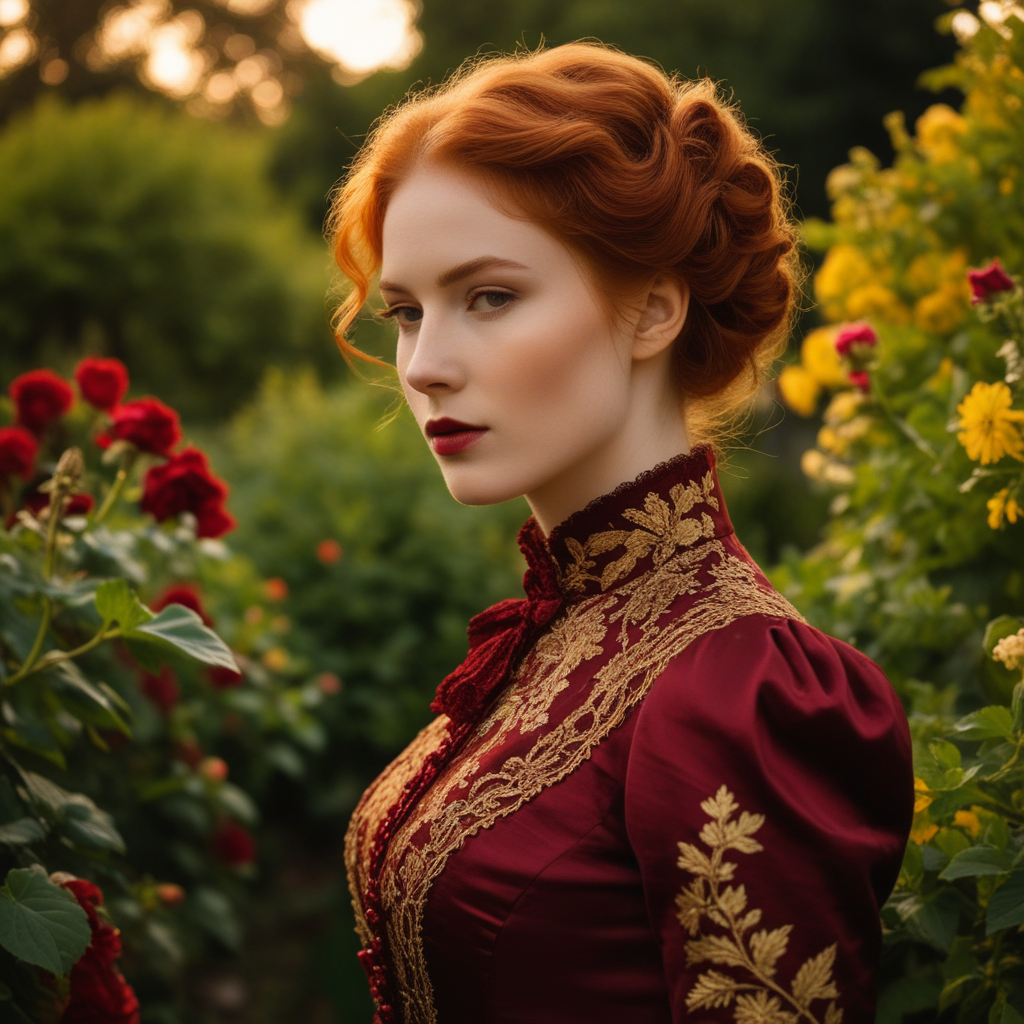

In [18]:
prompt_1 = """
A majestic lion with its mouth wide open in a fierce roar, showing sharp teeth and intense, powerful expression.
The lion's mane is flowing slightly, adding a sense of movement.
"""

prompt_2 = """
A beautiful woman with a calm, soft expression, her eyes occasionally blinking naturally.
Her hair gently sways as if a light breeze is passing through, giving a graceful and serene appearance.
"""

image_name = 'Elegant_2'
image = Image.open(f'Image Generation/Juggernaut XI/{image_name}.png')
image

In [19]:
video = pipe(
    prompt=prompt_2,
    image=image,
    num_frames=16,
    num_inference_steps=50,
    guidance_scale=9
).frames[0]

  0%|          | 0/50 [00:00<?, ?it/s]

In [20]:
directory = 'Video Generation/I2VGenXL/'
count = count_mp4_files_with_name(directory, image_name)

output_path = f"{directory}" + f"{image_name}_{count}.mp4"
export_video(video, output_path)

Moviepy - Building video Video Generation/I2VGenXL/Elegant_2_0.mp4.
Moviepy - Writing video Video Generation/I2VGenXL/Elegant_2_0.mp4



Moviepy - Done !
Moviepy - video ready Video Generation/I2VGenXL/Elegant_2_0.mp4
Video exported to Video Generation/I2VGenXL/Elegant_2_0.mp4


In [21]:
display(Video(output_path, width=700, height=700))

### 3.3 Stable Video Diffusion I2V XT

In [12]:
pipe = StableVideoDiffusionPipeline.from_pretrained("stabilityai/stable-video-diffusion-img2vid-xt", torch_dtype=torch.float16).to('cuda')
pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

StableVideoDiffusionPipeline {
  "_class_name": "StableVideoDiffusionPipeline",
  "_diffusers_version": "0.30.3",
  "_name_or_path": "stabilityai/stable-video-diffusion-img2vid-xt",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    "transformers",
    "CLIPVisionModelWithProjection"
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "unet": [
    "diffusers",
    "UNetSpatioTemporalConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKLTemporalDecoder"
  ]
}

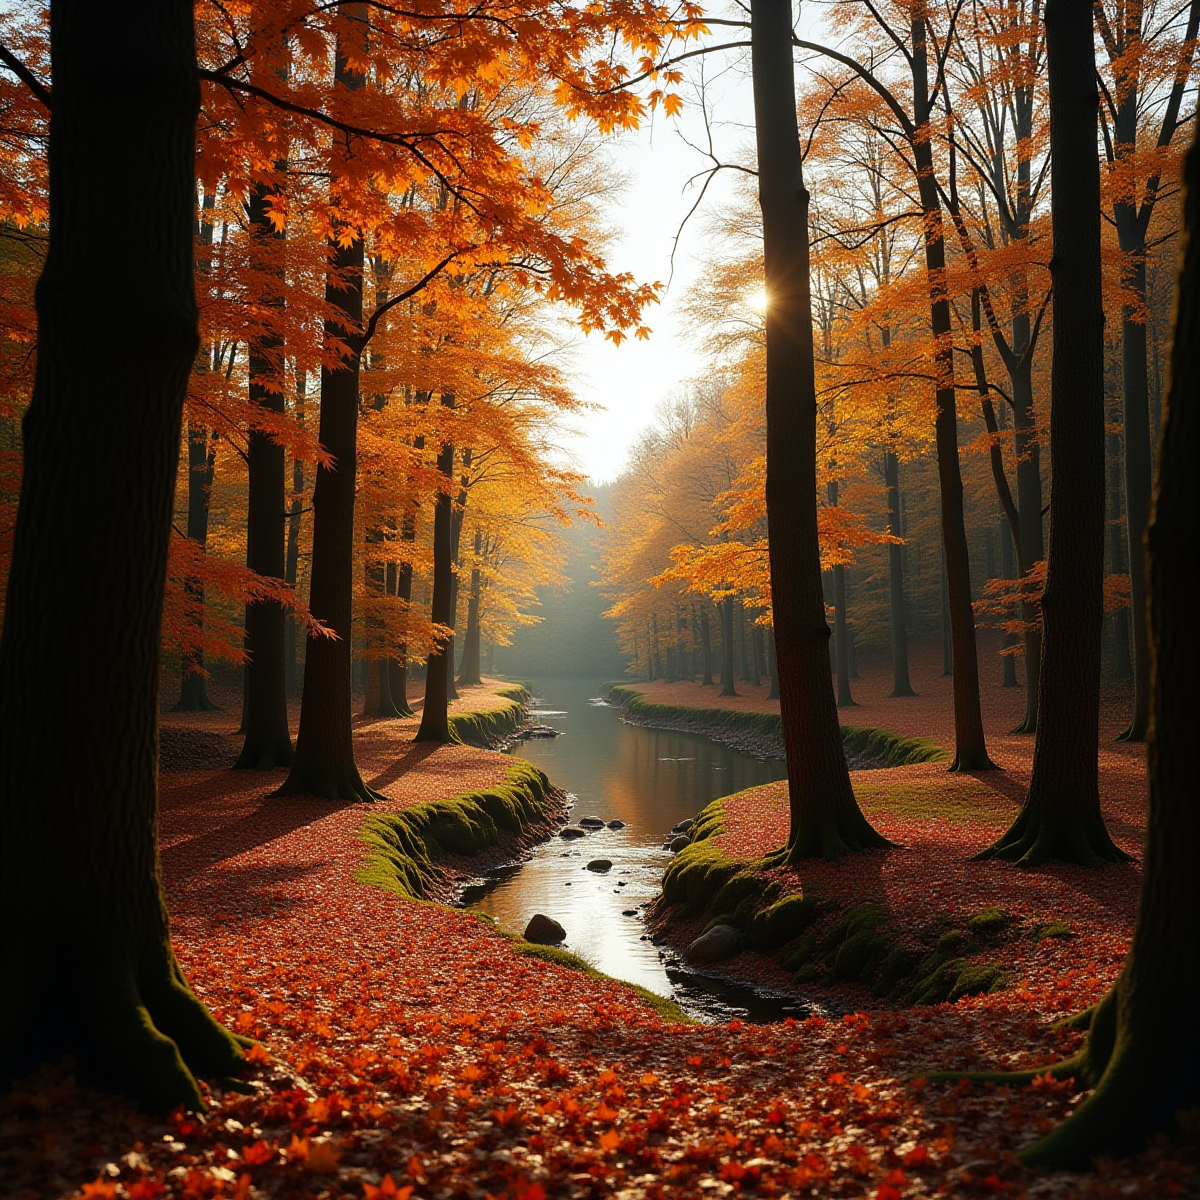

In [13]:
image_name = '0'
image = Image.open(f'Image Generation/FLUX.1 FilmPortrait/{image_name}.png')
image

In [14]:
video = pipe(
    image=image,
    num_frames=25,
    height=576, 
    width=768,
    fps=8,
    generator=torch.manual_seed(42)
).frames[0]

  0%|          | 0/25 [00:00<?, ?it/s]

In [15]:
# Searching pattern that we will apply in the directory
searching_pattern = os.path.join('Video Generation/Stable-Video-Diffusion-I2V-XT/', f'*FilmPortrait_{image_name}_Movements*.mp4')

# Find the matching files and return the number of them
matching_files = glob.glob(searching_pattern)
file_count = len(matching_files)

output_path = f"Video Generation/Stable-Video-Diffusion-I2V-XT/FilmPortrait_{image_name}_Movements_{file_count}.mp4"
export_to_video(video, output_path, fps=8)

'Video Generation/Stable-Video-Diffusion-I2V-XT/FilmPortrait_0_Movements_2.mp4'

In [16]:
display(Video(output_path, width=700, height=450))

## 4. Text to Video Generation

### 4.1 AnimateLCM

In [ ]:
adapter = MotionAdapter.from_pretrained("wangfuyun/AnimateLCM", torch_dtype=torch.float16)
pipe = AnimateDiffPipeline.from_pretrained("emilianJR/epiCRealism", motion_adapter=adapter, torch_dtype=torch.float16).to('cuda')
pipe.scheduler = LCMScheduler.from_config(pipe.scheduler.config, beta_schedule="linear")

pipe.load_lora_weights("wangfuyun/AnimateLCM", weight_name="AnimateLCM_sd15_t2v_lora.safetensors", adapter_name="lcm-lora")
pipe.set_adapters(["lcm-lora"], [0.8])

In [ ]:
prompt = """
A close look to a kids sad face  near a window a rainning day, 4k, high resolution
"""

In [ ]:
video = pipe(
    prompt=prompt,
    negative_prompt="bad quality, worse quality, low resolution, bad face",
    num_frames=24,
    guidance_scale=1.5,
    num_inference_steps=50,
).frames[0]

### 4.2 CogVideoX-5b

In [ ]:
pipe = CogVideoXPipeline.from_pretrained(
    "THUDM/CogVideoX-5b",
    torch_dtype=torch.bfloat16
)

pipe.enable_model_cpu_offload()
pipe.vae.enable_slicing()
pipe.vae.enable_tiling()

In [ ]:
prompt = """

"""

In [ ]:
video = pipe(
    prompt=prompt,
    num_videos_per_prompt=1,
    num_inference_steps=40,
    num_frames=49,
    guidance_scale=6,
    generator=torch.Generator(device="cuda").manual_seed(42),
).frames[0]

In [ ]:
directory = 'Video Generation/CogVideoX-5B/'
count = count_mp4_files_with_name(directory, image_name)

output_path = f"{directory}" + f"{image_name}_{count}.mp4"
export_to_video(video, output_path, fps=8)

In [ ]:
display(Video(output_path, width=700, height=450))